## DSP Chapter 2:  Algorithm Analysis

This notebook references these specific sections:

Ch 2 Data Structures in Python (DSP): 

https://runestone.academy/ns/books/published/pythonds3/AlgorithmAnalysis/toctree.html?mode=browsing

This notebook by:

***Eric V. Level***  

Graduate Programs in Software Engineering and Data Science  
University of St Thomas
St Paul, MN

Includes material from our primary online site...:

- ***Problem Solving with Algorithms and Data Structures using Python***   
by Brad Miller and David Ranum  
Luther College 
(DSP for short)

https://runestone.academy/ns/books/published/pythonds3/index.html?mode=browsing

...along with material from this secondary source.

- ***How to Think Like a Computer Scientist in Python"***   
by Brad Miller and David Ranum  
Luther College 
(HTT for short)

https://runestone.academy/ns/books/published/thinkcspy/index.html#



### DSP 2.1 - Chapter Objectives

- To understand why algorithm analysis is important.

- To be able to use Big-O to describe execution time.

- To understand the Big-O execution time of common operations on Python lists and dictionaries.

- To understand how the implementation of Python data impacts algorithm analysis.

- To understand how to benchmark simple Python programs.

### 2.2 - What is Algorithm Analysis?

It is very common for beginning computer science students to compare their programs with one another. You may also have noticed that it is common for computer programs to look very similar, especially the simple ones. An interesting question often arises. When two programs solve the same problem but look different, is one program better than the other?

In order to answer this question, we need to remember that there is an important difference between a program and the underlying algorithm that the program is representing. As we stated in Chapter 1, an algorithm is a generic, step-by-step list of instructions for solving a problem. It is a method for solving any instance of the problem so that given a particular input, the algorithm produces the desired result. A program, on the other hand, is an algorithm that has been encoded into some programming language. There may be many programs for the same algorithm, depending on the programmer and the programming language being used.

To explore this difference further, consider the function shown in ActiveCode 1. This function solves a familiar problem, computing the sum of the first n integers. The algorithm uses the idea of an **accumulator variable** that is initialized to 0. The solution then iterates through the `n` integers, adding each to the accumulator.

In [2]:
# dsp-2_2_1_active1.py

def sum_of_n(n):
    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i

    return the_sum


print(sum_of_n(10))


55


Now look at the function in ActiveCode 2. At first glance it may look strange, but upon further inspection you can see that this function is essentially doing the same thing as the previous one. The reason this is not obvious is poor coding. We did not use good identifier names to assist with readability, and we used an extra assignment statement that was not really necessary during the accumulation step.

In [3]:
# dsp-2_2_2_active2.py

def foo(tom):
    fred = 0
    for bill in range(1, tom + 1):
        barney = bill
        fred = fred + barney

    return fred


print(foo(10))

55


The question we raised earlier asked whether one function is better than another. The answer depends on your criteria. The function `sum_of_n` is certainly better than the function `foo` if you are concerned with readability. In fact, you have probably seen many examples of this in your introductory programming course since one of the goals there is to help you write programs that are easy to read and easy to understand. In this course, however, we are also interested in characterizing the algorithm itself. (We certainly hope that you will continue to strive to write readable, understandable code.)

Algorithm analysis is concerned with comparing algorithms based upon the amount of computing resources that each algorithm uses. We want to be able to consider two algorithms and say that one is better than the other because it is more efficient in its use of those resources or perhaps because it simply uses fewer. From this perspective, the two functions above seem very similar. They both use essentially the same algorithm to solve the summation problem.

At this point, it is important to think more about what we really mean by computing resources. There are two different ways to look at this. One way is to consider the amount of space or memory an algorithm requires to solve the problem. The amount of space required by a problem solution is typically dictated by the problem instance itself. Every so often, however, there are algorithms that have very specific space requirements, and in those cases we will be very careful to explain the variations.

As an alternative to space requirements, we can analyze and compare algorithms based on the amount of time they require to execute. This measure is sometimes referred to as the execution time or running time of the algorithm. One way we can measure the execution time for the function `sum_of_n` is to do a ***benchmark analysis***. This means that we will track the actual time required for the program to compute its result. In Python, we can benchmark a function by noting the starting time and ending time within the system we are using. In the `time` module there is a function called `time` that will return the current system clock time in seconds since some arbitrary starting point. By calling this function twice, at the beginning and at the end, and then computing the difference, we can get an exact number of seconds (fractions in most cases) for execution.

In [4]:
# dsp-2_2_4_timed1.py

import time


def sum_of_n_2(n):
    start = time.time()

    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i

    end = time.time()

    return the_sum, end - start


Listing 1 shows the original `sum_of_n` function with the timing calls embedded before and after the summation. The function returns a tuple consisting of the result and the amount of time (in seconds) required for the calculation. If we perform five invocations of the function, each computing the sum of the first 10,000 integers, we get the following:

In [5]:
# dsp-2_2_4_timed1.py, continued

for i in range(5):

    print("Sum is %d required %10.7f seconds" % sum_of_n_2(10000))
    
# Note:  timing in notebook seems faster than that quoted in book!


Sum is 50005000 required  0.0006669 seconds
Sum is 50005000 required  0.0012920 seconds
Sum is 50005000 required  0.0014269 seconds
Sum is 50005000 required  0.0018008 seconds
Sum is 50005000 required  0.0010409 seconds


### Extra! 

IPython notebooks have ***magic functions***.

`%%timeit` is such a function...

These and others are discussed in the *Python for Data Science* notebooks by Jake VanderPlas, posted under our Canvas site's references module.  Also, here's a link to the online book without notebooks:  

https://jakevdp.github.io/PythonDataScienceHandbook/

In [6]:
# dsp-2_2_4_timed1.py without timing

def sum_of_n_2_timeit(n):
    
    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i

    return the_sum


`%%timeit` is the IPython analog to the `time.time` function, automating the timing process (no need to call `time()`).

In [7]:
%%timeit
sum_of_n_2_timeit(100000)

3.97 ms ± 9.75 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
# time the following statements:  the single line version of %%timeit
result = %timeit -o sum_of_n_2_timeit(1)
result
# we'll continue looking at this in Lab 3-5...

237 ns ± 0.151 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


<TimeitResult : 237 ns ± 0.151 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)>

For timing within a notebook, `%%timeit` is probably more accurate.

#### End of Extra...

We discover that the time is fairly consistent and it takes on average about 0.0019 seconds to execute that code. What if we run the function adding the first 100,000 integers?

In [9]:
for i in range(5):

    print("Sum is %d required %10.7f seconds" % sum_of_n_2(100000))

Sum is 5000050000 required  0.0110111 seconds
Sum is 5000050000 required  0.0074720 seconds
Sum is 5000050000 required  0.0044692 seconds
Sum is 5000050000 required  0.0046000 seconds
Sum is 5000050000 required  0.0039940 seconds


In [10]:
%%timeit # Extra!
sum_of_n_2_timeit(100000)

3.98 ms ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Again, the time required for each run, although longer, is very consistent, averaging about 10 times more seconds. For n equal to 1,000,000 we get:

In [11]:
for i in range(5):

    print("Sum is %d required %10.7f seconds" % sum_of_n_2(1000000))

Sum is 500000500000 required  0.0429769 seconds
Sum is 500000500000 required  0.0422840 seconds
Sum is 500000500000 required  0.0425959 seconds
Sum is 500000500000 required  0.0424390 seconds
Sum is 500000500000 required  0.0424819 seconds


In [12]:
%%timeit # Extra!!
sum_of_n_2_timeit(1000000)

40.5 ms ± 51.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In this case, the average again turns out to be about 10 times the previous experiment.

Now consider ActiveCode 3, which shows a different means of solving the summation problem. This function, sum_of_n_3, takes advantage of a closed equation
to compute the sum of the first n integers without iterating.

In [13]:
# _dsp-2_2_3_active3.py

def sum_of_n_3(n):
    return (n * (n + 1)) / 2

print(sum_of_n_3(10))


55.0


In [14]:
import time

def sum_of_n_3(n):
    start = time.time()
    result = (n * (n + 1)) / 2
    end = time.time()
    return result, end-start


If we do the same benchmark measurement for `sum_of_n_3`, using five different values for `n` (10,000, 100,000, 1,000,000, 10,000,000, and 100,000,000), we get the following results:

Sum is 50005000 required 0.00000095 seconds  
Sum is 5000050000 required 0.00000191 seconds  
Sum is 500000500000 required 0.00000095 seconds  
Sum is 50000005000000 required 0.00000095 seconds  
Sum is 5000000050000000 required 0.00000119 seconds  

In [15]:
for count in range(4,9):
    
    # print (f'{10.7:sum_of_n_3(10**count)} seconds')
    print ("%d took %10.7f seconds" % (sum_of_n_3(10**count)))

50005000 took  0.0000000 seconds
5000050000 took  0.0000000 seconds
500000500000 took  0.0000000 seconds
50000005000000 took  0.0000000 seconds
5000000050000000 took  0.0000007 seconds


There are two important things to notice about this output. First, the times recorded above are shorter than any of the previous examples. Second, they are very consistent no matter what the value of `n`. It appears that `sum_of_n_3` is hardly impacted by the number of integers being added.

But what does this benchmark really tell us? Intuitively, we can see that the iterative solutions seem to be doing more work since some program steps are being repeated. This is likely the reason it is taking longer. Also, the time required for the iterative solution seems to increase as we increase the value of n. However, if we ran the same function on a different computer or used a different programming language, we would likely get different results. It could take even longer to perform `sum_of_n_3` if the computer were older.

We need a better way to characterize these algorithms with respect to execution time. The benchmark technique computes the actual time to execute. It does not really provide us with a useful measurement, because it is dependent on a particular machine, program, time of day, compiler, and programming language. Instead, we would like to have a characterization that is independent of the program or computer being used. This measure would then be useful for judging the algorithm alone and could be used to compare algorithms across implementations.

### 2.3 - Big-O Notation

When trying to characterize an algorithm’s efficiency in terms of execution time, independent of any particular program or computer, it is important to quantify the number of operations or steps that the algorithm will require. If each of these steps is considered to be a basic unit of computation, then the execution time for an algorithm can be expressed as the number of steps required to solve the problem. Deciding on an appropriate basic unit of computation can be a complicated problem and will depend on how the algorithm is implemented.

A good basic unit of computation for comparing the summation algorithms shown earlier might be the number of assignment statements performed to compute the sum. In the function `sum_of_n`, the number of assignment statements is `1` (`the_sum == 0`) plus the value of `n` (the number of times we perform `the_sum = the_sum + i`). We can denote this by a function, call it `T`, where `T(n) = 1+n`. The parameter `n` is often referred to as the “size of the problem,” and we can read this as “`T(n)` is the time it takes to solve a problem of size `n`, namely `n+1` steps.”

In the summation functions given above, it makes sense to use the number of terms in the summation to denote the size of the problem. We can then say that the sum of the first 100,000 integers is a bigger instance of the summation problem than the sum of the first 1,000. Because of this, it might seem reasonable that the time required to solve the larger case would be greater than for the smaller case. Our goal then is to show how the algorithm’s execution time changes with respect to the size of the problem.

Computer scientists prefer to take this analysis technique one step further. It turns out that the exact number of operations is not as important as determining the most dominant part of the `T(n)` function. In other words, as the problem gets larger, some portion of the `T(n)` function tends to overpower the rest. This dominant term is what, in the end, is used for comparison. The ***order of magnitude*** function describes the part of that increases the fastest as the value of n increases. Order of magnitude is often called Big-O notation (for order) and written as `O(f(n))`. It provides a useful approximation of the actual number of steps in the computation. The function `f(n)` provides a simple representation of the dominant part of the original `T(n)`.

In the above example,`T(n) = 1 + n`. As `n` gets larger, the constant `1` will become less and less significant to the final result. If we are looking for an approximation for `T(n)`, then we can drop the `1` and simply say that the running time is `O(n)`. It is important to note that the `1` is certainly significant for `T(n)`. However, as `n` gets large, our approximation will be just as accurate without it.

As another example, suppose that for some algorithm, the exact number of steps is `T(n) = 5n^2 + 27n +1005`. When `n` is small, say `1` or `2`, the constant `1005` seems to be the dominant part of the function. However, as `n` gets larger, the `n^2` term becomes the most important. In fact, when `n` is really large, the other two terms become insignificant in the role that they play in determining the final result. Again, to approximate `T(n)` as `n` gets large, we can ignore the other terms and focus on `5n^2`. In addition, the coefficient `5` becomes insignificant as `n` gets large. We would say then that the function `T(n)` has an order of magnitude `f(n) = n*n`, or simply that it is `O(n*n)`.

Although we do not see this in the summation example, sometimes the performance of an algorithm depends on the exact values of the data rather than simply the size of the problem. For these kinds of algorithms we need to characterize their performance in terms of ***best case***, ***worst case***, or ***average case*** performance. The worst case performance refers to a particular data set where the algorithm performs especially poorly, whereas a different data set for the exact same algorithm might have extraordinarily good (best case) performance. However, in most cases the algorithm performs somewhere in between these two extremes (average case performance). It is important for a computer scientist to understand these distinctions so they are not misled by one particular case.

A number of very common order of magnitude functions will come up over and over as you study algorithms. These are shown in *Table 1*. In order to decide which of these functions is the dominant part of any
function, we must see how they compare with one another as n gets large.

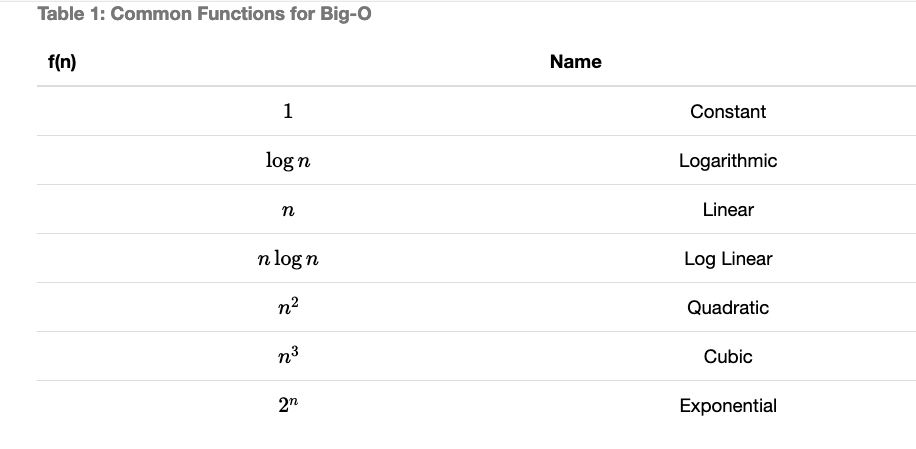

Figure 1 shows graphs of the common functions from Table 1. Notice that when n is small, the functions are not very well defined with respect to one another. It is hard to tell which is dominant. However, as `n` grows, there is a definite relationship and it is easy to see how they compare with one another.

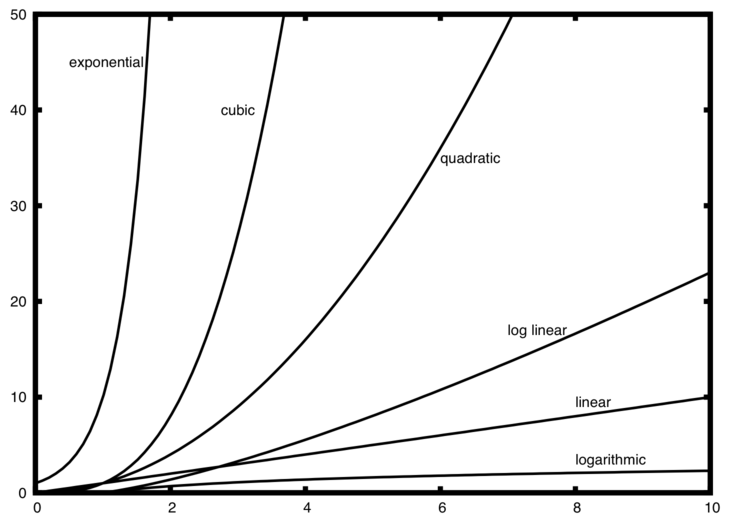

Figure 1: Plot of Common Big-O Functions

As a final example, suppose that we have the fragment of Python code shown in Listing 2. Although this program does not really do anything, it is instructive to see how we can take actual code and analyze performance.

**Listing 2**

In [45]:
a = 5 # 3
b = 6
c = 10
n = 100
for i in range(n): # 3n**2
    for j in range(n):
        x = i * i
        y = j * j
        z = i * j
for k in range(n): # 2n
    w = a * k + 45
    v = b * b
d = 33

The number of assignment operations is the sum of four terms. 

The first term is the constant `3`, representing the three assignment statements at the start of the fragment. 

The second term is `3n**2`, since there are three statements that are performed times due to the nested iteration. 

The third term is `2n`, two statements iterated `n` times. 

Finally, the fourth term is the constant `1`, representing the final assignment statement. 

This gives us `T(n) = 3 + 3n**2 + 2n + 1 == 3n**2 + 2n + 4`

By looking at the exponents, we can easily see that the term will be dominant and therefore this fragment of code is `O(n**2)`.

Note that all of the other terms as well as the coefficient on the dominant term can be ignored as n grows larger.

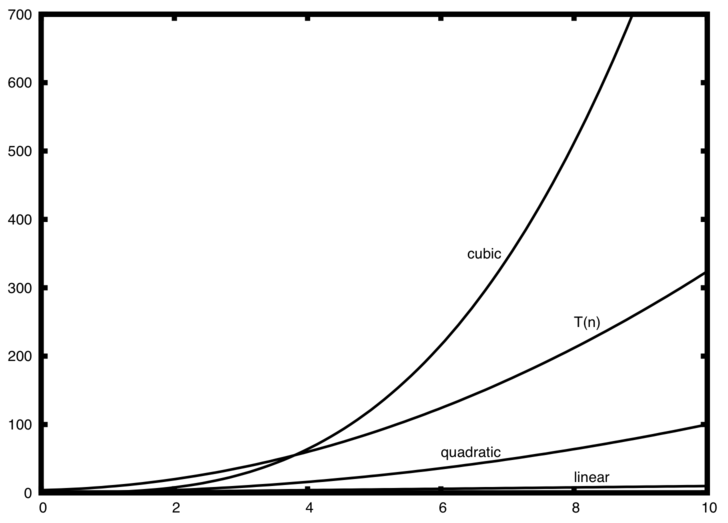

***Figure 2: Comparing with Common Big-O Functions***

Figure 2 shows a few of the common Big-O functions as they compare with the `T(n)` function discussed above. Note that is initially larger than the cubic function. However, as `n` grows, the cubic function quickly overtakes `T(n)`. It is easy to see that `T(n)` then follows the quadratic function as continues to grow.

### Self Check

Write two Python functions to find the minimum number in a list. The first function should compare each number to every other number on the list (`O(n**2)`). 

The second function should be linear (`O(n)`).

In [48]:
def each_other(lst):
    for an_elt in lst:
        smallest = True # until we find a counterexample to each_elt > an_elt
        for each_elt in lst:
            if each_elt < an_elt:
                smallest = False
                break
        if smallest:
            return each_elt

def linear_max(lst):
    smallest = lst[0]
    for each_elt in lst:
        if smallest > each_elt:
            smallest = each_elt
            
    return smallest

In [49]:
# try each on a random list

import random
the_list = [random.randint(1,1000) for i in range(1000)]

print ("smallest via each_other():", each_other(the_list))
print ("smallest via linear_max():", linear_max(the_list))

smallest via each_other(): 352
smallest via linear_max(): 1


### 2.4 - An Anagram Detection Example

A good example problem for showing algorithms with different orders of magnitude is the classic anagram detection problem for strings. One string is an ***anagram*** of another if the second is simply a rearrangement of the first. For example, `heart` and `earth` are anagrams. The strings `python` and `typhon` are anagrams as well. For the sake of simplicity, we will assume that the two strings in question are of equal length and that they are made up of symbols from the set of 26 lowercase alphabetic characters. Our goal is to write a boolean function that will take two strings and return whether they are anagrams.

### 2.4.1. Solution 1: Anagram Detection Checking Off

Our first solution to the anagram problem will check the lengths of the strings and then to see that each character in the first string actually occurs in the second. If it is possible to check off each character, then the two strings must be anagrams. ***Checking off*** a character will be accomplished by replacing it with the special Python value `None`. However, since strings in Python are immutable, the first step in the process will be to convert the second string to a list. Each character from the first string can be checked against the characters in the list and if found, checked off by replacement. ActiveCode 1 shows this function.

In [19]:
# _dsp-2_4_1_1_active5.py

def anagram_solution_1(s1, s2):
    still_ok = True
    if len(s1) != len(s2):
        still_ok = False

    a_list = list(s2)
    pos_1 = 0

    while pos_1 < len(s1) and still_ok:
        pos_2 = 0
        found = False
        while pos_2 < len(a_list) and not found:
            if s1[pos_1] == a_list[pos_2]:
                found = True
            else:
                pos_2 = pos_2 + 1
        if found:
            a_list[pos_2] = None
        else:
            still_ok = False
        pos_1 = pos_1 + 1

    return still_ok


print(anagram_solution_1("apple", "pleap"))  # expected: True
print(anagram_solution_1("abcd", "dcba"))  # expected: True
print(anagram_solution_1("abcd", "dcda"))  # expected: False


True
True
False


To analyze this algorithm, we need to note that each of the `n` characters in `s1` will cause an iteration through up to `n` characters in the list from `s2`. Each of the `n` positions in the list will be visited once to match a character from `s1`. The number of visits then becomes the sum of the integers from `1` to `n`. We stated earlier that this can be written as 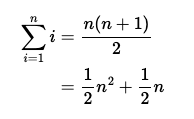

As gets large, the `n**2` term will dominate the `n` term and the `1/2` can be ignored. Therefore, this solution is
`O(n**2)`.

### 2.4.2. Anagram Detection Solution 2: Sort and Compare

Another solution to the anagram problem will make use of the fact that even though `s1` and `s2` are different, they are anagrams only if they consist of exactly the same characters. So if we begin by sorting each string alphabetically from a to z, we will end up with the same string if the original two strings are anagrams. ActiveCode 2 shows this solution. Again, in Python we can use the built-in `sort` method on lists by simply converting each string to a list at the start.

In [20]:
# _dsp-2_4_2_1_active6.py

def anagram_solution_2(s1, s2):
    a_list_1 = list(s1)
    a_list_2 = list(s2)

    a_list_1.sort()
    a_list_2.sort()

    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if a_list_1[pos] == a_list_2[pos]:
            pos = pos + 1
        else:
            matches = False

    return matches


print(anagram_solution_2("apple", "pleap"))  # expected: True
print(anagram_solution_2("abcd", "dcba"))  # expected: True
print(anagram_solution_2("abcd", "dcda"))  # expected: False


True
True
False


At first glance you may be tempted to think that this algorithm is `O(n)`, since there is one simple iteration to compare the `n` characters after the sorting process. However, the two calls to the Python sort method are not without their own cost. As we will see in Chapter 5, sorting is typically either `O(n**2)` or `O(n*log(N))`, so the sorting operations dominate the iteration. In the end, this algorithm will have the same order of magnitude as that of the sorting process.

### 2.4.3 - Anagram Detection Solution 3: Brute Force

A brute force technique for solving a problem typically tries to exhaust all possibilities. For the anagram detection problem, we can simply generate a list of all possible strings using the characters from `s1` and then see if `s2` occurs. However, there is a problem with this approach. When generating all possible strings from `s1`, there are `n` possible first characters, `n-1` possible characters for the second position, `n-2` for the third, and so on. The total number of candidate strings is `n*(n-1)*(n-2)*...*3*2*1`, which is `n!`. Although some of the strings may be duplicates, the program cannot know this ahead of time and so it will still generate `n!` different strings.

It turns out that `n!` grows even faster than `2**n` as `n` gets large. In fact, if `s1` were 20 characters long, there would be `20!` == 2,432,902,008,176,640,000 possible candidate strings. If we processed one possibility every second, it would still take us 77,146,816,596 years to go through the entire list. This is probably not going to be a good solution.

### 2.4.4 - Anagram Detection Solution 2: Count and Compare

Our final solution to the anagram problem takes advantage of the fact that any two anagrams will have the same number of a’s, the same number of b’s, the same number of c’s, and so on. In order to decide whether two strings are anagrams, we will first count the number of times each character occurs. Since there are 26 possible characters, we can use a list of 26 counters, one for each possible character. Each time we see a particular character, we will increment the counter at that position. In the end, if the two lists of counters are identical, the strings must be anagrams. ActiveCode 3 shows this solution.

In [21]:
# _dsp-2_4_4_1_active7.py

def anagram_solution_4(s1, s2):
    c1 = [0] * 26
    c2 = [0] * 26

    for i in range(len(s1)):
        pos = ord(s1[i]) - ord("a")
        c1[pos] = c1[pos] + 1

    for i in range(len(s2)):
        pos = ord(s2[i]) - ord("a")
        c2[pos] = c2[pos] + 1

    j = 0
    still_ok = True
    while j < 26 and still_ok:
        if c1[j] == c2[j]:
            j = j + 1
        else:
            still_ok = False

    return still_ok


print(anagram_solution_4("apple", "pleap"))  # expected: True
print(anagram_solution_4("abcd", "dcba"))  # expected: True
print(anagram_solution_4("abcd", "dcda"))  # expected: False


True
True
False


Again, the solution has a number of iterations. However, unlike the first solution, none of them are nested. The first two iterations used to count the characters are both based on n. The third iteration, comparing the two lists of counts, always takes 26 steps since there are 26 possible characters in the strings. Adding it all up gives us
`T(n) = 2n + 26` steps. That is `O(n)`.  We have found a linear order of magnitude algorithm for solving this problem.

Before leaving this example, we need to say something about space requirements. Although the last solution was able to run in linear time, it could only do so by using additional storage to keep the two lists of character counts. In other words, this algorithm sacrificed space in order to gain time.

This is a common occurrence. On many occasions you will need to make decisions between time and space trade-offs. In this case, the amount of extra space is not significant. However, if the underlying alphabet had millions of characters, there would be more concern. As a computer scientist, when given a choice of algorithms, it will be up to you to determine the best use of computing resources given a particular problem.

### Self Check

Q-4: Given the following code fragment, what is its Big-O running time?

```
test = 0
for i in range(n):
   for j in range(n):
      test = test + i * j
```
A. `O(n)`  
B. `O(n^2)`  
C. `O(log n)`  
D. `O(n^3)`  


In [36]:
n = 10
test = 0
test1 = []
for i in range(n):
    for j in range(n):
        test = test + i * j
        test1.append(test)

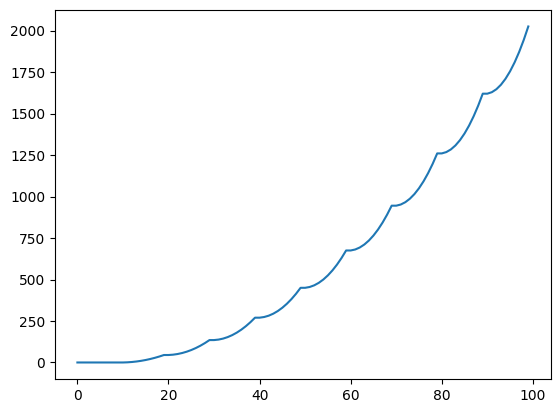

In [43]:
import matplotlib.pyplot as plt
plt.plot(test1)

Answer - `O(n^2)`


Q-5: Given the following code fragment what is its Big-O running time?

```
test = 0
for i in range(n):
   test = test + 1

for j in range(n):
   test = test - 1
```

A. `O(n)`  
B. `O(n^2)`  
C. `O(log n)`  
D. `O(n^3)`  

Answer - `O(n)`

Q-6: Given the following code fragment what is its Big-O running time?

```
i = n
while i > 0:
   k = 2 + 2
   i = i // 2
```
A. `O(n)`  
B. `O(n^2)`  
C. `O(log n)`  
D. `O(n^3)`  

### 2.5 - Performance of Python Data Structures

Now that you have a general idea of Big-O notation and the differences between the different functions, our goal in this section is to tell you about the Big-O performance for the operations on Python lists and dictionaries. We will then show you some timing experiments that illustrate the costs and benefits of using certain operations on each data structure. It is important for you to understand the efficiency of these Python data structures because they are the building blocks we will use as we implement other data structures in the remainder of the book. In this section we are not going to explain why the performance is what it is. In later chapters you will see some possible implementations of both lists and dictionaries and how the performance depends on the implementation.


### 2.6 - Lists

The designers of Python had many choices to make when they implemented the list data structure. Each of these choices could have an impact on how fast list operations perform. To help them make the right choices they looked at the ways that people would most commonly use the list data structure and they optimized their implementation of a list so that the most common operations were very fast. Of course they also tried to make the less common operations fast, but when a trade-off had to be made the performance of a less common operation was often sacrificed in favor of the more common operation.

Two common operations are indexing and assigning to an index position. Both of these operations take the same amount of time no matter how large the list becomes. When an operation like this is independent of the size of the list, it is `O(1)`.

Another very common programming task is to grow a list. There are two ways to create a longer list. You can use the `append` method or the concatenation operator `+`. The `append` method is `O(1)`. However, the concatenation operator `+` is `O(k)` where `k` is the size of the list that is being concatenated. This is important for you to know because it can help you make your own programs more efficient by choosing the right tool for the job.

Let’s look at four different ways we might generate a list of `n` numbers starting with 0. First we’ll try a for loop and create the list by concatenation, then we’ll use `append` rather than concatenation. Next, we’ll try creating the list using list comprehension and finally, and perhaps the most obvious way, using the `range` function wrapped by a call to the list constructor. Listing 3 shows the code for making our list four different ways.

In [24]:
# _dsp-2_6_1_listing_3.py

def test1():
    l = []
    for i in range(1000):
        l = l + [i]


def test2():
    l = []
    for i in range(1000):
        l.append(i)


def test3():
    l = [i for i in range(1000)]


def test4():
    l = list(range(1000))

To capture the time it takes for each of our functions to execute we will use Python’s `timeit` module. The `timeit` module is designed to allow Python developers to make cross-platform timing measurements by running functions in a consistent environment and using timing mechanisms that are as similar as possible across operating systems.

To use `timeit` you create a `Timer` object whose parameters are two Python statements. The first parameter is a Python statement that you want to time; the second parameter is a statement that will run once to set up the test. The `timeit` module will then time how long it takes to execute the statement some number of times. By default `timeit` will try to run the statement one million times. When it’s done it returns the time as a floating-point value representing the total number of seconds. However, since it executes the statement a million times, you can read the result as the number of microseconds to execute the test one time. You can also pass `timeit` a named parameter called `number` that allows you to specify how many times the test statement is executed. The following session shows how long it takes to run each of our test functions a thousand times.



In [25]:
# _dsp-2_6_1_listing_3_5.py

from timeit import Timer


t1 = Timer("test1()", "from __main__ import test1")
print(f"concatenation: {t1.timeit(number=1000):15.2f} milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print(f"appending: {t2.timeit(number=1000):19.2f} milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print(f"list comprehension: {t3.timeit(number=1000):10.2f} milliseconds")
t4 = Timer("test4()", "from __main__ import test4")
print(f"list range: {t4.timeit(number=1000):18.2f} milliseconds")


concatenation:            0.97 milliseconds
appending:                0.05 milliseconds
list comprehension:       0.02 milliseconds
list range:               0.01 milliseconds


In the experiment above the statement that we are timing is the function call to `test1()`, `test2()`, and so on. The setup statement may look very strange to you, so let’s consider it in more detail. You are probably very familiar with the `from...import` statement, but this is usually used at the beginning of a Python program file. In this case the statement `from __main__ import test1` imports the function `test1` from the `__main__` namespace into the namespace that `timeit` sets up for the timing experiment. The `timeit` module does this because it wants to run the timing tests in an environment that is uncluttered by any stray variables you may have created that may interfere with your function’s performance in some unforeseen way.

From the experiment above it is clear that the `append` operation at 0.31 milliseconds is much faster than concatenation at 6.54 milliseconds. We also show the times for two additional methods for creating a list: using the list constructor with a call to range and a list comprehension. It is interesting to note that the list comprehension is twice as fast as a for loop with an append operation.

One final observation about this little experiment is that all of the times that you see above include some overhead for actually calling the test function, but we can assume that the function call overhead is identical in all four cases so we still get a meaningful comparison of the operations. So it would not be accurate to say that the concatenation operation takes 6.54 milliseconds but rather the concatenation test function takes 6.54 milliseconds. As an exercise you could test the time it takes to call an empty function and subtract that from the numbers above.

Now that we have seen how performance can be measured concretely, you can look at Table 2 to see the Big-O efficiency of all the basic list operations. After thinking carefully about Table 2, you may be wondering about the two different times for `pop`. When `pop` is called on the end of the list it takes `O(1)`, but when `pop` is called on the first element in the list—or anywhere in the middle it—is `O(n)`. The reason for this lies in how Python chooses to implement lists. When an item is taken from the front of the list, all the other elements in the list are shifted one position closer to the beginning. This may seem silly to you now, but if you look at Table 2 you will see that this implementation also allows the `index` operation to be `O(1)`. This is a tradeoff that the Python designers thought was a good one.

 **Table 2:** Big-O Efficiency of Python List Operators

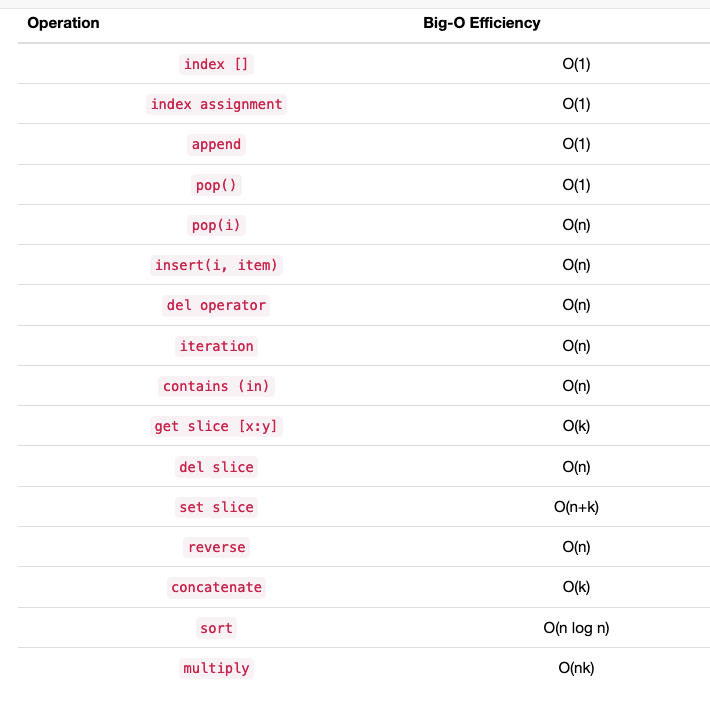

As a way of demonstrating this difference in performance, let’s do another experiment using the `timeit` module. Our goal is to be able to verify the performance of the `pop` operation on a list of a known size when the program pops from the end of the list, and again when the program pops from the beginning of the list. We will also want to measure this time for lists of different sizes. What we would expect to see is that the time required to pop from the end of the list will stay constant even as the list grows in size, while the time to pop from the beginning of the list will continue to increase as the list grows.

Listing 4 shows one attempt to measure the difference between the two uses of `pop`. As you can see from this first example, popping from the end takes 0.00014 milliseconds, whereas popping from the beginning takes 2.09779 milliseconds. For a list of two million elements this is a factor of 15,000.

There are a couple of things to notice about Listing 4. The first is the statement from `__main__ import x`. Although we did not define a function, we do want to be able to use the `list` object `x` in our test. This approach allows us to time just the single `pop` statement and get the most accurate measure of the time for that single operation. Because the timer repeats a thousand times, it is also important to point out that the list is decreasing in size by one each time through the loop. But since the initial list is two million elements in size, we only reduce the overall size by 0.05%.

In [26]:
# _dsp-2_6_2_listing_4.py

from timeit import Timer

pop_zero = Timer("x.pop(0)", "from __main__ import x")
pop_end = Timer("x.pop()", "from __main__ import x")

x = list(range(2000000))
print(f"pop(0): {pop_zero.timeit(number=1000):10.5f} milliseconds")

x = list(range(2000000))
print(f"pop(): {pop_end.timeit(number=1000):11.5f} milliseconds")

pop(0):    0.53914 milliseconds
pop():     0.00004 milliseconds


While our first test does show that `pop(0)` is indeed slower than `pop()`, it does not validate the claim that `pop(0)` is `O(n)` while `pop()` is `O(1)`. To validate that claim we need to look at the performance of both calls over a range of list sizes. Listing 5 implements this test.

In [27]:
# _dsp-2_6_2_listing_5.py

from timeit import Timer

pop_zero = Timer("x.pop(0)", "from __main__ import x")
pop_end = Timer("x.pop()", "from __main__ import x")
print(f"{'n':10s}{'pop(0)':>15s}{'pop()':>15s}")
for i in range(1_000_000, 100_000_001, 1_000_000):
    x = list(range(i))
    pop_zero_t = pop_zero.timeit(number=1000)
    x = list(range(i))
    pop_end_t = pop_end.timeit(number=1000)
    print(f"{i:<10d}{pop_zero_t:>15.5f}{pop_end_t:>15.5f}")

n                  pop(0)          pop()
1000000           0.26229        0.00004
2000000           0.52637        0.00004
3000000           0.99992        0.00006
4000000           1.38494        0.00006
5000000           1.84490        0.00006
6000000           2.14535        0.00006
7000000           2.42686        0.00005
8000000           2.72227        0.00005
9000000           3.08093        0.00005
10000000          3.64285        0.00004
11000000          4.48405        0.00005
12000000          4.02760        0.00004
13000000          4.37715        0.00004
14000000          4.84272        0.00004
15000000          5.37718        0.00004


KeyboardInterrupt: 

Figure 3 shows the results of our experiment. You can see that as the list gets longer and longer the time it takes to pop(0) also increases while the time for `pop` stays very flat. This is exactly what we would expect to see for an `O(n)` and `O(1)` algorithm.

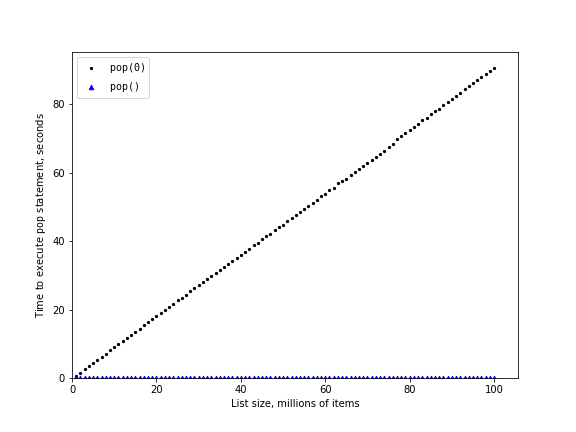

Among the sources of error in our little experiment is the fact that there are other processes running on the computer as we measure that may slow down our code, so even though we try to minimize other things happening on the computer there is bound to be some variation in time. That is why the loop runs the test one thousand times in the first place to statistically gather enough information to make the measurement reliable.

### 2.7 - Dictionaries

The second major Python data structure is the **dictionary**. As you probably recall, dictionaries differ from lists in that you can access items in a dictionary by a key rather than a position. Later in this book you will see that there are many ways to implement a dictionary. The thing that is most important to notice right now is that the `get item` and `set item` operations on a dictionary are `O(1)`. Another important dictionary operation is the `contains` operation. Checking to see whether a key is in the dictionary or not is also `O(1)`. The efficiency of all dictionary operations is summarized in Table 3. One important side note on dictionary performance is that the efficiencies we provide in the table are for average performance. In some rare cases the `contains`, `get item`, and `set item` operations can degenerate into performance, but we will get into that in Chapter 8 when we talk about the different ways that a dictionary could be implemented.

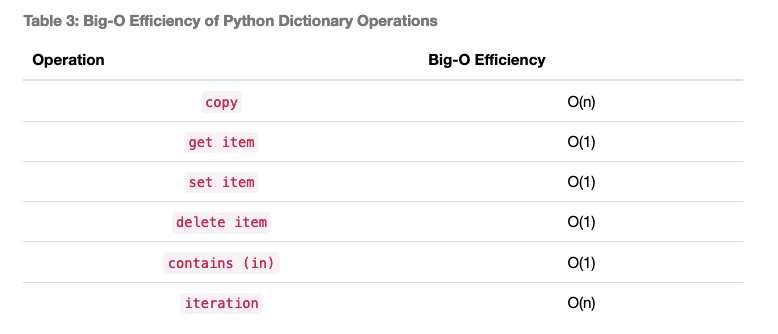

For our last performance experiment we will compare the performance of the `contains` operation between lists and dictionaries. In the process we will confirm that the `contains` operator for lists is `O(n)` and the `contains` operator for dictionaries is `O(1)`. The experiment we will use to compare the two is simple: we’ll make a list with a range of numbers in it, then we will pick numbers at random and check to see if the numbers are in the list. If our performance tables are correct, the bigger the list, the longer it should take to determine if any one number is contained in the list.

We will repeat the same experiment for a dictionary that contains numbers as the keys. In this experiment we should see that determining whether or not a number is in the dictionary is not only much faster, but the time it takes to check should remain constant even as the dictionary grows larger.

Listing 6 implements this comparison. Notice that we are performing exactly the same operation, `number in container`. The difference is that on line 8 `x` is a list, and on line 10 `x` is a dictionary.

In [28]:
# _dsp-2_9_1_2.py

import timeit
import random


print(f"{'n':10s}{'list':>10s}{'dict':>10s}")

for i in range(10_000, 1_000_001, 20_000):

    t = timeit.Timer(f"random.randrange({i}) in x", "from __main__ import random, x")

    x = list(range(i))

    lst_time = t.timeit(number=1000)

    x = {j: None for j in range(i)}

    dict_time = t.timeit(number=1000)

    print(f"{i:<10,}{lst_time:>10.3f}{dict_time:>10.3f}")

n               list      dict
10,000         0.067     0.001
30,000         0.153     0.000
50,000         0.261     0.000
70,000         0.369     0.001
90,000         0.466     0.001
110,000        0.619     0.001
130,000        0.666     0.001
150,000        0.793     0.001
170,000        0.895     0.001
190,000        0.951     0.001
210,000        1.096     0.001
230,000        1.187     0.001
250,000        1.305     0.001
270,000        1.395     0.001
290,000        1.543     0.001
310,000        1.670     0.001
330,000        1.752     0.001
350,000        1.780     0.001
370,000        1.950     0.001
390,000        1.981     0.001
410,000        2.165     0.001
430,000        2.509     0.001
450,000        2.423     0.001
470,000        2.492     0.002
490,000        2.485     0.001
510,000        2.702     0.001
530,000        2.815     0.001
550,000        2.991     0.002


KeyboardInterrupt: 

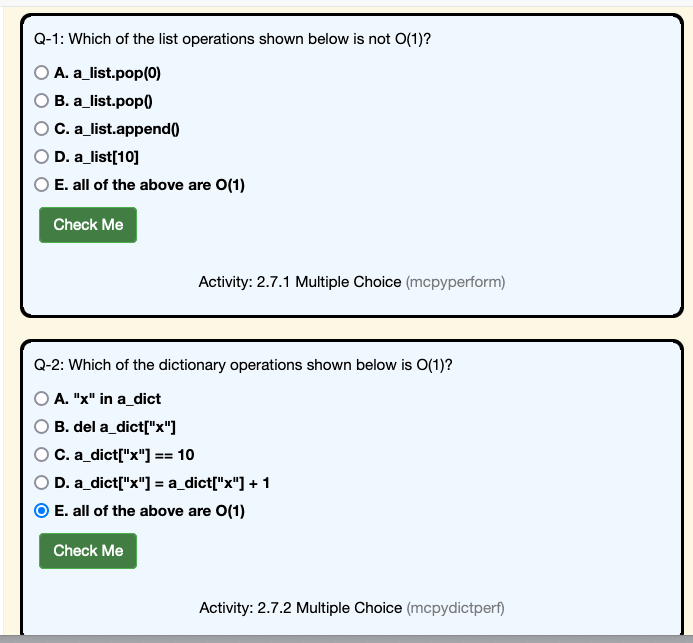

### 2.8 - Summary



**Algorithm analysis** is an implementation-independent way of measuring an algorithm.

**Big-O notation** allows algorithms to be classified by their dominant process with respect to the size of the problem.


### 2.9 - Key Terms

- average case
	
- benchmark analysis
	
- Big-O notation

- brute force
	
- checking off
	
- constant

- cubic
	
- exponential	

- linear

- log linear
	
- logarithmic
	
- order of magnitude

- quadratic
	
- time complexity
	
- worst case

### Lab_3_5 problem:  use `%timeit` + processing to generate times in seconds for n=100,200,... 

In [29]:
# repeated here for convenience...

# dsp-2_2_4_timed1.py without timing

def sum_of_n_2_timeit(n):
    
    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i

    return the_sum


In [30]:
def convert(result):
    
    tconv={'ns':0.0000000001, 'µs':0.000001, 'ms':0.001} # to convert ms to 0.001, etc
    
    v1 = str(result).split('±')
    v2=v1[0].split()
    return float(v2[0])*tconv[v2[1]] 

Run the following - but notice the quotent is growing without bounds.  Fix it so it "converges"...

In [31]:
for n in range(0,200000,1000):
    result = %timeit -q -o sum_of_n_2_timeit(n) # -q => quiet (no screen display)
    parsed_result = convert(result) # convert text output to pure decimal
    print ('n==',n, parsed_result/1)  # not the correct O(n)!  Fix it and rerun...


n== 0 1.73e-08
n== 1000 3.5e-05
n== 2000 7.099999999999999e-05
n== 3000 0.00010999999999999999
n== 4000 0.000143
n== 5000 0.000179
n== 6000 0.000216
n== 7000 0.000251
n== 8000 0.000294
n== 9000 0.000335
n== 10000 0.000361
n== 11000 0.000395
n== 12000 0.00043099999999999996
n== 13000 0.00047099999999999996
n== 14000 0.000504
n== 15000 0.000539
n== 16000 0.000575
n== 17000 0.000611
n== 18000 0.000647
n== 19000 0.000683
n== 20000 0.0007239999999999999
n== 21000 0.000799
n== 22000 0.00087
n== 23000 0.000878
n== 24000 0.0009199999999999999
n== 25000 0.0009549999999999999
n== 26000 0.00101
n== 27000 0.00103
n== 28000 0.00109
n== 29000 0.00111
n== 30000 0.00116
n== 31000 0.0012
n== 32000 0.00122
n== 33000 0.00126
n== 34000 0.0013000000000000002
n== 35000 0.00136
n== 36000 0.0014399999999999999


KeyboardInterrupt: 

Extra:  try converting to `Timer` as done earlier in the chapter...

In [32]:
from timeit import Timer

t1 = Timer("test1()", "from __main__ import test1")
print(f"concatenation: {t1.timeit(number=1000):15.2f} milliseconds")

concatenation:            1.06 milliseconds


In [33]:
# replace %timeit with Timer approach

for n in range(0,20000,1000):
    result = %timeit -q -o sum_of_n_2_timeit(n) # -q => quiet (no screen display)